In [2]:
# !pip install seaborn, matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression     #can't  use since doesn't support multi-label classification problem
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [49]:
training_data=pd.read_excel(r"Final Data/final_training_data.xlsx")

In [50]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   respondent_id                26707 non-null  int64
 1   h1n1_concern                 26707 non-null  int64
 2   h1n1_knowledge               26707 non-null  int64
 3   behavioral_antiviral_meds    26707 non-null  int64
 4   behavioral_avoidance         26707 non-null  int64
 5   behavioral_face_mask         26707 non-null  int64
 6   behavioral_wash_hands        26707 non-null  int64
 7   behavioral_large_gatherings  26707 non-null  int64
 8   behavioral_outside_home      26707 non-null  int64
 9   behavioral_touch_face        26707 non-null  int64
 10  doctor_recc_h1n1             26707 non-null  int64
 11  doctor_recc_seasonal         26707 non-null  int64
 12  chronic_med_condition        26707 non-null  int64
 13  child_under_6_months         26707 non-null  i

In [51]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,0,1,8,2,0,0,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,1,0,1,0,0,0,13,20,0,1
2,2,1,1,0,1,0,0,0,0,0,...,0,0,9,0,2,0,15,22,0,0
3,3,1,1,0,1,0,1,1,0,0,...,1,1,5,1,0,0,0,0,0,1
4,4,2,1,0,1,0,1,1,0,1,...,0,0,9,0,1,0,19,6,0,0


In [52]:
training_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,36.057363,44.687011,26.630846,78.594376,7.182462,16.548957,32.929943,31.036769,48.596735,...,0.374920,0.656232,4.829745,0.833489,94.102894,93.754259,5.290710,6.242371,0.212454,0.465608
std,7709.791156,585.769779,657.478073,514.874267,878.930512,266.607037,396.186224,569.754574,553.193202,690.533223,...,0.622325,0.814312,2.805984,0.823313,960.902667,960.936641,7.079824,7.957241,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000,0.000000,1.000000
max,26706.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,2.000000,3.000000,9.000000,2.000000,9999.000000,9999.000000,21.000000,23.000000,1.000000,1.000000


#### Checking the correlation in this case, makes sense because the variables are encoded with "Label encoders"

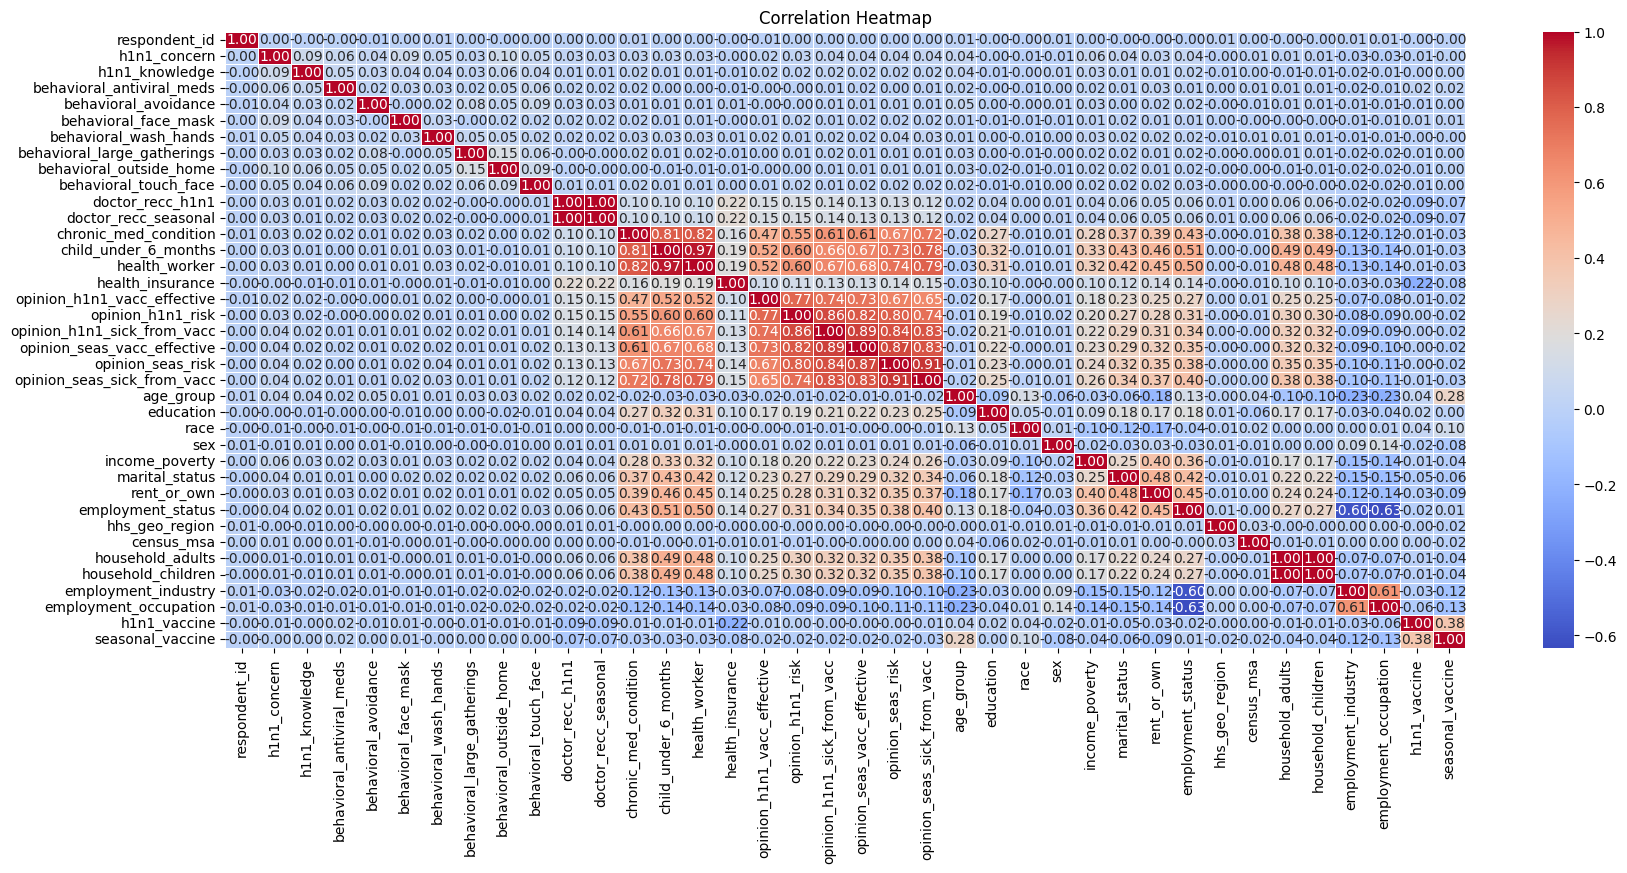

In [8]:
correlation_matrix = training_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 8)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", # Format annotation values to two decimal places
            linewidths=.5) # Add lines between cells for better separation

plt.title('Correlation Heatmap')
plt.show()

In [9]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = training_data.columns
vif_data['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]

print(vif_data)

                        feature           VIF
0                 respondent_id  3.614482e+00
1                  h1n1_concern  1.042663e+00
2                h1n1_knowledge  1.025213e+00
3     behavioral_antiviral_meds  1.018603e+00
4          behavioral_avoidance  1.028475e+00
5          behavioral_face_mask  1.014453e+00
6         behavioral_wash_hands  1.014688e+00
7   behavioral_large_gatherings  1.039378e+00
8       behavioral_outside_home  1.050973e+00
9         behavioral_touch_face  1.030885e+00
10             doctor_recc_h1n1  6.211656e+07
11         doctor_recc_seasonal  6.211801e+07
12        chronic_med_condition  3.292425e+00
13         child_under_6_months  1.838908e+01
14                health_worker  1.885135e+01
15             health_insurance  2.082966e+00
16  opinion_h1n1_vacc_effective  2.765153e+00
17            opinion_h1n1_risk  5.137138e+00
18  opinion_h1n1_sick_from_vacc  7.291281e+00
19  opinion_seas_vacc_effective  6.511584e+00
20            opinion_seas_risk  8

In [53]:
# doctor_recc_h1n1 and doctor_recc_seasonal both are identical : doctor recommendation to take the vaccine
# opinion_seas_sick_from_vacc and opinion_seas_risk are identical : respondent opinion whether they get sick after taking vaccine
# opinion_h1n1_sick_from_vacc and opinion_h1n1_risk are identical

# 'household_children','opinion_seas_sick_from_vacc','doctor_recc_seasonal',
# training_data.drop(columns=["child_under_6_months","doctor_recc_seasonal","opinion_h1n1_sick_from_vacc","opinion_seas_sick_from_vacc","household_children"],axis=1,inplace=True)

In [54]:
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = training_data.columns
vif_data['VIF'] = [variance_inflation_factor(training_data.values, i) for i in range(training_data.shape[1])]

print(vif_data)

                        feature           VIF
0                 respondent_id  3.614482e+00
1                  h1n1_concern  1.042663e+00
2                h1n1_knowledge  1.025213e+00
3     behavioral_antiviral_meds  1.018603e+00
4          behavioral_avoidance  1.028475e+00
5          behavioral_face_mask  1.014453e+00
6         behavioral_wash_hands  1.014688e+00
7   behavioral_large_gatherings  1.039378e+00
8       behavioral_outside_home  1.050973e+00
9         behavioral_touch_face  1.030885e+00
10             doctor_recc_h1n1  6.211656e+07
11         doctor_recc_seasonal  6.211801e+07
12        chronic_med_condition  3.292425e+00
13         child_under_6_months  1.838908e+01
14                health_worker  1.885135e+01
15             health_insurance  2.082966e+00
16  opinion_h1n1_vacc_effective  2.765153e+00
17            opinion_h1n1_risk  5.137138e+00
18  opinion_h1n1_sick_from_vacc  7.291281e+00
19  opinion_seas_vacc_effective  6.511584e+00
20            opinion_seas_risk  8

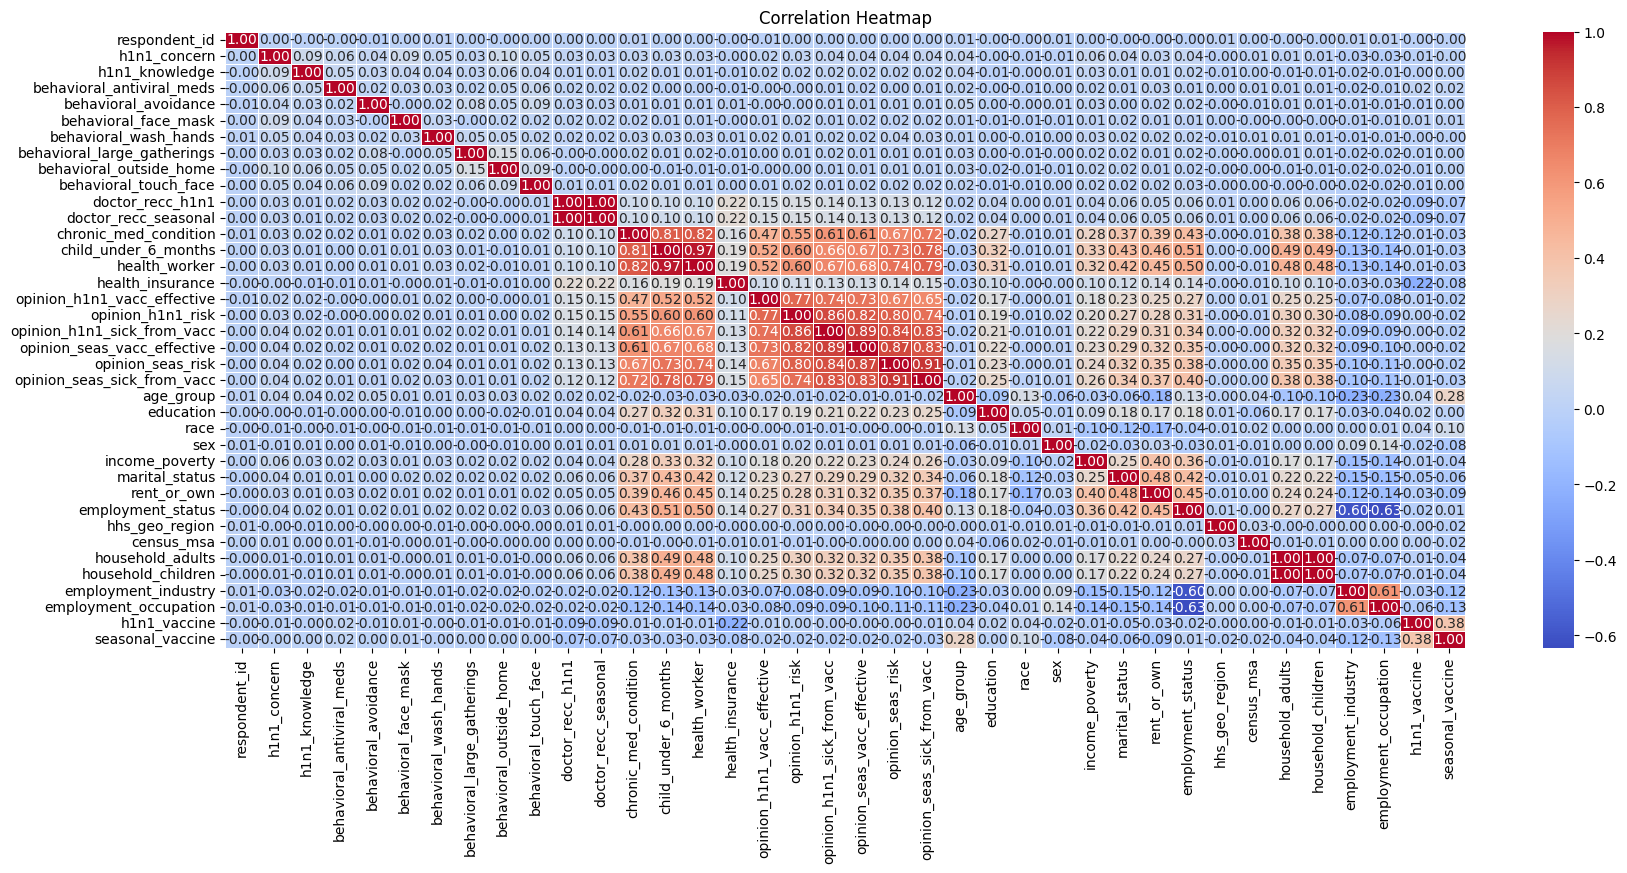

In [55]:
correlation_matrix = training_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 8)) # Optional: Adjust figure size
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", # Format annotation values to two decimal places
            linewidths=.5) # Add lines between cells for better separation

plt.title('Correlation Heatmap')
plt.show()

#### Going ahead with the current choice of variables because even though pairwise correlation is high, the VIF is low meaning that the estimates of the variables doesn't have much variance in its estimates with the current set of variables

## Model training


In [56]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,0,1,8,2,0,0,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,1,0,1,0,0,0,13,20,0,1
2,2,1,1,0,1,0,0,0,0,0,...,0,0,9,0,2,0,15,22,0,0
3,3,1,1,0,1,0,1,1,0,0,...,1,1,5,1,0,0,0,0,0,1
4,4,2,1,0,1,0,1,1,0,1,...,0,0,9,0,1,0,19,6,0,0


In [57]:
training_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [58]:
# from imblearn.over_sampling import RandomOverSampler

In [59]:
# # Define the independent and dependent variables
# X=training_data.drop(["h1n1_vaccine","seasonal_vaccine"],axis=1)
# # y=np.c_[training_data["h1n1_vaccine"],training_data["seasonal_vaccine"]]
# y=training_data[["h1n1_vaccine","seasonal_vaccine"]]
# # split the set to training and test
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
rf_clf = RandomForestClassifier(n_estimators=300,random_state=0,min_samples_leaf=3,class_weight="balanced").fit(X_train, y_train)

In [ ]:
y_pred=rf_clf.predict_proba(X_test)

In [63]:
y_score = np.transpose([score[:, 1] for score in y_pred])


In [64]:
# threshold = 0.7 # Custom threshold
# predicted_classes = (y_score >= threshold).astype(int)

In [65]:
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy with threshold {threshold}: {accuracy}")

Accuracy with threshold 0.7: 0.6452639460876076


##### mutlilabel confusion matrix

In [66]:
y_score.shape

(5342, 2)

In [67]:
y_test.shape

(5342, 2)

In [68]:
y_pred_label = rf_clf.predict(X_test)

In [69]:
y_test.to_numpy()

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 1]], dtype=int64)

In [70]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test.to_numpy(),y_pred_label)

array([[[3864,  348],
        [ 486,  644]],

       [[2158,  733],
        [ 541, 1910]]], dtype=int64)

In [71]:
import numpy as np
from sklearn.metrics import f1_score

y_true = y_test.to_numpy()

thresholds = np.arange(0.1, 0.9, 0.05)   # thresholds to try
best_thresholds = []

for i in range(y_true.shape[1]):  # loop over each label
    best_f1 = 0
    best_t = 0.5
    for t in thresholds:
        y_pred = (y_score[:, i] >= t).astype(int)
        f1 = f1_score(y_true[:, i], y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
    best_thresholds.append(best_t)

print("Optimal thresholds:", best_thresholds)


Optimal thresholds: [0.40000000000000013, 0.45000000000000007]


In [72]:
import numpy as np

y_true = y_test.to_numpy()

# Initialize empty predictions
y_pred_opt = np.zeros_like(y_score, dtype=int)

# Apply threshold per label
for i, t in enumerate(best_thresholds):
    y_pred_opt[:, i] = (y_score[:, i] >= t).astype(int)


In [73]:
y_score

array([[0.34116956, 0.4201679 ],
       [0.46783935, 0.35885708],
       [0.22552394, 0.59515713],
       ...,
       [0.81305446, 0.80562421],
       [0.15736387, 0.31493021],
       [0.19609905, 0.46443954]])

In [74]:
y_pred_opt

array([[0, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 1],
       [0, 0],
       [0, 1]])

In [75]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Confusion matrices per label
print(multilabel_confusion_matrix(y_true, y_pred_opt))

# Precision, recall, f1 per label
print(classification_report(y_true, y_pred_opt, target_names=["h1n1", "seasonal vaccine"]))


[[[3585  627]
  [ 350  780]]

 [[1985  906]
  [ 413 2038]]]
                  precision    recall  f1-score   support

            h1n1       0.55      0.69      0.61      1130
seasonal vaccine       0.69      0.83      0.76      2451

       micro avg       0.65      0.79      0.71      3581
       macro avg       0.62      0.76      0.69      3581
    weighted avg       0.65      0.79      0.71      3581
     samples avg       0.36      0.39      0.37      3581



c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

In [76]:
y_score = np.transpose([score[:, 1] for score in y_pred])

roc_auc_score(y_true, y_score, average="macro")


IndexError: invalid index to scalar variable.

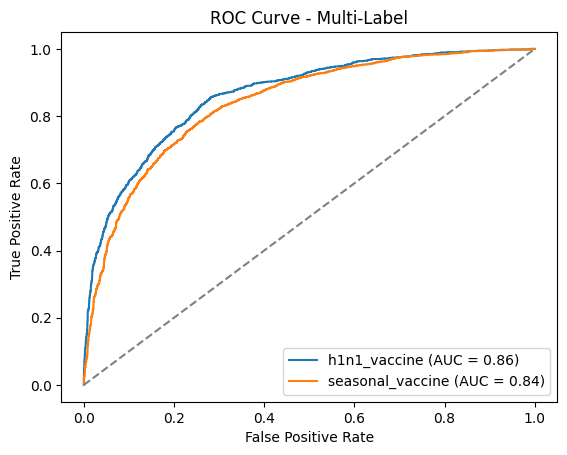

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_np = y_test.to_numpy()       # convert this to numpy since it is in pandas df 
# y_score_np = y_score.to_numpy()

for i, label in enumerate(["h1n1_vaccine", "seasonal_vaccine"]):
    fpr, tpr, _ = roc_curve(y_test_np[:, i], y_score[:, i])
    roc_auc = roc_auc_score(y_test_np[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Label')
plt.legend()
plt.show()

In [ ]:
# True postive rate = TP/(TP+FN)
# False postive rate = FP/(FP+TN)

# Since my objective in this problem is to identify which individual should get the vaccine dosage, my aim should be to Increase the TPR and decrease the FPR

##### XGBOOST

In [125]:
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier

# Example: X_train, X_test, y_train, y_test already defined
# y_train and y_test are multilabel (shape: n_samples x 2)

xgb_model = OneVsRestClassifier(
    xgb.XGBClassifier(n_estimators=200, max_depth=2, learning_rate=0.01,
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    )
)

xgb_model.fit(X_train, y_train)


c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:59:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [19:59:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [126]:
y_score_xgb = xgb_model.predict_proba(X_test)

# Convert to numpy array (in case some outputs are lists)
y_score_xgb = np.array(y_score_xgb)


In [127]:
from sklearn.metrics import f1_score
import numpy as np

y_true = y_test.to_numpy()
thresholds = np.arange(0.1, 0.9, 0.05)
best_thresholds_xgb = []

for i in range(y_true.shape[1]):  
    best_f1, best_t = 0, 0.5
    for t in thresholds:
        y_pred = (y_score_xgb[:, i] >= t).astype(int)
        f1 = f1_score(y_true[:, i], y_pred)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    best_thresholds_xgb.append(best_t)

print("Optimal thresholds (XGBoost):", best_thresholds_xgb)


Optimal thresholds (XGBoost): [0.25000000000000006, 0.45000000000000007]


In [128]:
best_thresholds_xgb[1]=0.40

In [129]:
y_pred_opt_xgb = np.zeros_like(y_score_xgb, dtype=int)

for i, t in enumerate(best_thresholds_xgb):
    y_pred_opt_xgb[:, i] = (y_score_xgb[:, i] >= t).astype(int)


In [130]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, roc_auc_score

print(multilabel_confusion_matrix(y_true, y_pred_opt_xgb))
print(classification_report(y_true, y_pred_opt_xgb, target_names=["h1n1_vaccine", "seasonal_vaccine"]))

# ROC AUC (threshold independent)
roc_auc_labelwise = [roc_auc_score(y_true[:, i], y_score_xgb[:, i]) for i in range(y_true.shape[1])]
print("ROC AUC per label (XGBoost):", roc_auc_labelwise)
print("Macro ROC AUC (XGBoost):", np.mean(roc_auc_labelwise))


[[[3346  866]
  [ 279  851]]

 [[1717 1174]
  [ 369 2082]]]
                  precision    recall  f1-score   support

    h1n1_vaccine       0.50      0.75      0.60      1130
seasonal_vaccine       0.64      0.85      0.73      2451

       micro avg       0.59      0.82      0.69      3581
       macro avg       0.57      0.80      0.66      3581
    weighted avg       0.59      0.82      0.69      3581
     samples avg       0.39      0.41      0.39      3581

ROC AUC per label (XGBoost): [0.8470632789585593, 0.8129517724148765]
Macro ROC AUC (XGBoost): 0.8300075256867179


c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Manu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

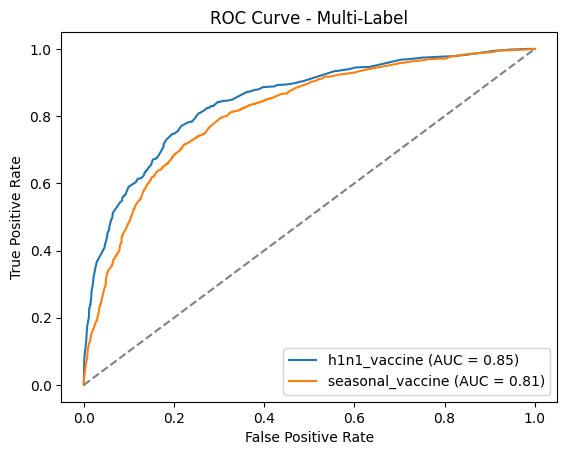

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_np = y_test.to_numpy()       # convert this to numpy since it is in pandas df 
# y_score_np = y_score.to_numpy()

for i, label in enumerate(["h1n1_vaccine", "seasonal_vaccine"]):
    fpr, tpr, _ = roc_curve(y_test_np[:, i], y_score_xgb[:, i])
    roc_auc = roc_auc_score(y_test_np[:, i], y_score_xgb[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Label')
plt.legend()
plt.show()

In [133]:
# y_score = np.transpose([score[:, 1] for score in y_pred])

roc_auc_score(y_true, y_score_xgb, average="macro")


0.8300075256867179

##### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_clf=MLPClassifier(max_iter=1000,hidden_layer_sizes=7,random_state=0).fit(X_train,y_train)

In [ ]:
y_pred=mlp_clf.predict_proba(X_test)

In [ ]:
y_score = np.transpose([score[:, 1] for score in y_pred])

In [ ]:
y_score

array([[0.34116956, 0.4201679 ],
       [0.46783935, 0.35885708],
       [0.22552394, 0.59515713],
       ...,
       [0.81305446, 0.80562421],
       [0.15736387, 0.31493021],
       [0.19609905, 0.46443954]])

In [ ]:
roc_auc_score(y_test, y_score, average="macro")


0.8510106614017969

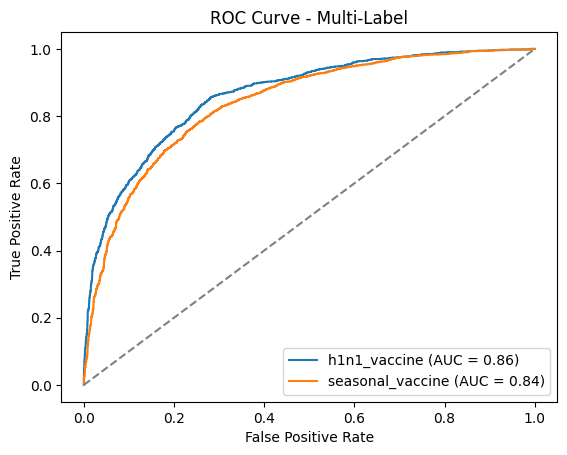

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_np = y_test.to_numpy()       # convert this to numpy since it is in pandas df 
# y_score_np = y_score.to_numpy()

for i, label in enumerate(["h1n1_vaccine", "seasonal_vaccine"]):
    fpr, tpr, _ = roc_curve(y_test_np[:, i], y_score[:, i])
    roc_auc = roc_auc_score(y_test_np[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Label')
plt.legend()
plt.show()

In [ ]:
training_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'household_adults', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [ ]:
training_data.groupby(['h1n1_vaccine',"seasonal_vaccine"])['respondent_id'].count()

h1n1_vaccine  seasonal_vaccine
0             0                   13295
              1                    7738
1             0                     977
              1                    4697
Name: respondent_id, dtype: int64

In [ ]:
training_data.groupby("h1n1_vaccine")["respondent_id"].count()

h1n1_vaccine
0    21033
1     5674
Name: respondent_id, dtype: int64

In [ ]:
training_data.groupby("seasonal_vaccine")['respondent_id'].count()

seasonal_vaccine
0    14272
1    12435
Name: respondent_id, dtype: int64